<a href="https://colab.research.google.com/github/codingstat/Internship/blob/main/Entri_Internship_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [4]:
from google.colab import files
uploaded=files.upload()

Saving supply_train.csv to supply_train.csv


In [94]:
df=pd.read_csv('supply_train.csv')
df.head(10)

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071
5,5,WH_100005,EID_50005,Rural,Small,West,Zone 1,8,0,2,...,1,152,35.0,2009.0,23,1,A+,3,3,32134
6,6,WH_100006,EID_50006,Rural,Large,West,Zone 6,8,0,4,...,1,77,27.0,2010.0,24,0,B,3,6,30142
7,7,WH_100007,EID_50007,Rural,Large,North,Zone 5,1,0,4,...,0,241,23.0,NaN,18,0,C,6,24,24093
8,8,WH_100008,EID_50008,Rural,Small,South,Zone 6,8,1,4,...,1,124,22.0,2013.0,13,1,A+,5,2,18082
9,9,WH_100009,EID_50009,Rural,Small,South,Zone 6,4,3,3,...,0,78,43.0,NaN,6,0,C,6,2,7130


In [7]:
df=pd.read_csv('supply_train.csv')
df.head(10)

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071
5,5,WH_100005,EID_50005,Rural,Small,West,Zone 1,8,0,2,...,1,152,35.0,2009.0,23,1,A+,3,3,32134
6,6,WH_100006,EID_50006,Rural,Large,West,Zone 6,8,0,4,...,1,77,27.0,2010.0,24,0,B,3,6,30142
7,7,WH_100007,EID_50007,Rural,Large,North,Zone 5,1,0,4,...,0,241,23.0,NaN,18,0,C,6,24,24093
8,8,WH_100008,EID_50008,Rural,Small,South,Zone 6,8,1,4,...,1,124,22.0,2013.0,13,1,A+,5,2,18082
9,9,WH_100009,EID_50009,Rural,Small,South,Zone 6,4,3,3,...,0,78,43.0,NaN,6,0,C,6,2,7130


from matplotlib import pyplot as plt
_df_0['Unnamed: 0'].plot(kind='hist', bins=20, title='Unnamed: 0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['num_refill_req_l3m'].plot(kind='hist', bins=20, title='num_refill_req_l3m')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['transport_issue_l1y'].plot(kind='hist', bins=20, title='transport_issue_l1y')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Competitor_in_mkt'].plot(kind='hist', bins=20, title='Competitor_in_mkt')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Location_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('WH_capacity_size').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('zone').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('WH_regional_zone').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Unnamed: 0', y='num_refill_req_l3m', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='num_refill_req_l3m', y='transport_issue_l1y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='transport_issue_l1y', y='Competitor_in_mkt', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='Competitor_in_mkt', y='retail_shop_num', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['num_refill_req_l3m']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Location_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Location_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('num_refill_req_l3m')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['num_refill_req_l3m']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('WH_capacity_size')):
  _plot_series(series, series_name, i)
  fig.legend(title='WH_capacity_size', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('num_refill_req_l3m')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['num_refill_req_l3m']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('zone')):
  _plot_series(series, series_name, i)
  fig.legend(title='zone', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('num_refill_req_l3m')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['num_refill_req_l3m']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('WH_regional_zone')):
  _plot_series(series, series_name, i)
  fig.legend(title='WH_regional_zone', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('num_refill_req_l3m')

from matplotlib import pyplot as plt
_df_16['Unnamed: 0'].plot(kind='line', figsize=(8, 4), title='Unnamed: 0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['num_refill_req_l3m'].plot(kind='line', figsize=(8, 4), title='num_refill_req_l3m')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['transport_issue_l1y'].plot(kind='line', figsize=(8, 4), title='transport_issue_l1y')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['Competitor_in_mkt'].plot(kind='line', figsize=(8, 4), title='Competitor_in_mkt')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['WH_capacity_size'].value_counts()
    for x_label, grp in _df_20.groupby('Location_type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Location_type')
_ = plt.ylabel('WH_capacity_size')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['zone'].value_counts()
    for x_label, grp in _df_21.groupby('WH_capacity_size')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('WH_capacity_size')
_ = plt.ylabel('zone')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['WH_regional_zone'].value_counts()
    for x_label, grp in _df_22.groupby('zone')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('zone')
_ = plt.ylabel('WH_regional_zone')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['wh_owner_type'].value_counts()
    for x_label, grp in _df_23.groupby('WH_regional_zone')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('WH_regional_zone')
_ = plt.ylabel('wh_owner_type')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['Location_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='Unnamed: 0', y='Location_type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['WH_capacity_size'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='Unnamed: 0', y='WH_capacity_size', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['zone'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='Unnamed: 0', y='zone', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['WH_regional_zone'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='Unnamed: 0', y='WH_regional_zone', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [8]:
df.columns

Index(['Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID', 'Location_type',
       'WH_capacity_size', 'zone', 'WH_regional_zone', 'num_refill_req_l3m',
       'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num',
       'wh_owner_type', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [9]:
df.shape

(16620, 25)

In [10]:
df.dtypes

Unnamed: 0                        int64
Ware_house_ID                    object
WH_Manager_ID                    object
Location_type                    object
WH_capacity_size                 object
zone                             object
WH_regional_zone                 object
num_refill_req_l3m                int64
transport_issue_l1y               int64
Competitor_in_mkt                 int64
retail_shop_num                   int64
wh_owner_type                    object
distributor_num                   int64
flood_impacted                    int64
flood_proof                       int64
electric_supply                   int64
dist_from_hub                     int64
workers_num                     float64
wh_est_year                     float64
storage_issue_reported_l3m        int64
temp_reg_mach                     int64
approved_wh_govt_certificate     object
wh_breakdown_l3m                  int64
govt_check_l3m                    int64
product_wg_ton                    int64


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    16620 non-null  int64  
 1   Ware_house_ID                 16620 non-null  object 
 2   WH_Manager_ID                 16620 non-null  object 
 3   Location_type                 16620 non-null  object 
 4   WH_capacity_size              16620 non-null  object 
 5   zone                          16620 non-null  object 
 6   WH_regional_zone              16620 non-null  object 
 7   num_refill_req_l3m            16620 non-null  int64  
 8   transport_issue_l1y           16620 non-null  int64  
 9   Competitor_in_mkt             16620 non-null  int64  
 10  retail_shop_num               16620 non-null  int64  
 11  wh_owner_type                 16620 non-null  object 
 12  distributor_num               16620 non-null  int64  
 13  f

In [12]:
df.isnull().sum()

Unnamed: 0                         0
Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [13]:
df=df.dropna()
df.isnull().sum()
df.head(10)

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071
5,5,WH_100005,EID_50005,Rural,Small,West,Zone 1,8,0,2,...,1,152,35.0,2009.0,23,1,A+,3,3,32134
6,6,WH_100006,EID_50006,Rural,Large,West,Zone 6,8,0,4,...,1,77,27.0,2010.0,24,0,B,3,6,30142
8,8,WH_100008,EID_50008,Rural,Small,South,Zone 6,8,1,4,...,1,124,22.0,2013.0,13,1,A+,5,2,18082
10,10,WH_100010,EID_50010,Rural,Large,North,Zone 6,7,1,3,...,1,150,37.0,1999.0,17,0,B+,4,6,21125
11,11,WH_100011,EID_50011,Rural,Large,North,Zone 6,7,0,5,...,0,225,16.0,2017.0,11,0,B,2,28,14115
12,12,WH_100012,EID_50012,Urban,Mid,North,Zone 2,4,0,3,...,0,95,28.0,2022.0,4,0,B+,1,1,5124
13,13,WH_100013,EID_50013,Rural,Mid,South,Zone 4,6,1,2,...,1,242,36.0,2008.0,22,1,A,5,11,30063
18,18,WH_100018,EID_50018,Rural,Mid,North,Zone 3,4,1,4,...,1,159,22.0,2001.0,29,1,A+,5,27,38082
20,20,WH_100020,EID_50020,Rural,Mid,South,Zone 2,8,0,2,...,1,65,41.0,2016.0,19,0,B+,4,1,24062


In [14]:
df.isnull().sum()

Unnamed: 0                      0
Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [15]:
df1 = df.drop(['Unnamed: 0', 'flood_proof','Ware_house_ID', 'WH_Manager_ID', 'wh_owner_type', 'wh_est_year', 'approved_wh_govt_certificate', 'temp_reg_mach', 'wh_breakdown_l3m',
       'govt_check_l3m','electric_supply','workers_num','flood_impacted','transport_issue_l1y'],axis='columns')

In [16]:
df1.columns

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'num_refill_req_l3m', 'Competitor_in_mkt', 'retail_shop_num',
       'distributor_num', 'dist_from_hub', 'storage_issue_reported_l3m',
       'product_wg_ton'],
      dtype='object')

In [17]:
for column in df1.columns:
    if df[column].dtypes=="object":
        print(df[column].value_counts(),"\n")

Rural    7381
Urban     725
Name: Location_type, dtype: int64 

Mid      3300
Large    3295
Small    1511
Name: WH_capacity_size, dtype: int64 

North    3288
West     2678
South    2004
East      136
Name: zone, dtype: int64 

Zone 6    2704
Zone 5    1470
Zone 4    1371
Zone 2     992
Zone 3     937
Zone 1     632
Name: WH_regional_zone, dtype: int64 



In [18]:
df1['Location_type'].unique()

array(['Rural', 'Urban'], dtype=object)

In [19]:
df1['Location_type'].value_counts()

Rural    7381
Urban     725
Name: Location_type, dtype: int64

In [20]:
df1['WH_capacity_size'].unique()

array(['Large', 'Small', 'Mid'], dtype=object)

In [21]:
df1['WH_capacity_size'].value_counts()

Mid      3300
Large    3295
Small    1511
Name: WH_capacity_size, dtype: int64

In [22]:
df1['zone'].unique()

array(['North', 'West', 'South', 'East'], dtype=object)

In [23]:
df1['zone'].value_counts()

North    3288
West     2678
South    2004
East      136
Name: zone, dtype: int64

In [24]:
df1['WH_regional_zone'].unique()

array(['Zone 5', 'Zone 1', 'Zone 6', 'Zone 2', 'Zone 4', 'Zone 3'],
      dtype=object)

In [25]:
df1['WH_regional_zone'].value_counts()

Zone 6    2704
Zone 5    1470
Zone 4    1371
Zone 2     992
Zone 3     937
Zone 1     632
Name: WH_regional_zone, dtype: int64

In [26]:
df1.head(5)

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,Competitor_in_mkt,retail_shop_num,distributor_num,dist_from_hub,storage_issue_reported_l3m,product_wg_ton
4,Rural,Large,North,Zone 5,3,2,4740,42,112,18,24071
5,Rural,Small,West,Zone 1,8,2,5053,37,152,23,32134
6,Rural,Large,West,Zone 6,8,4,4449,38,77,24,30142
8,Rural,Small,South,Zone 6,8,4,5381,42,124,13,18082
10,Rural,Large,North,Zone 6,7,3,4623,31,150,17,21125


<Axes: >

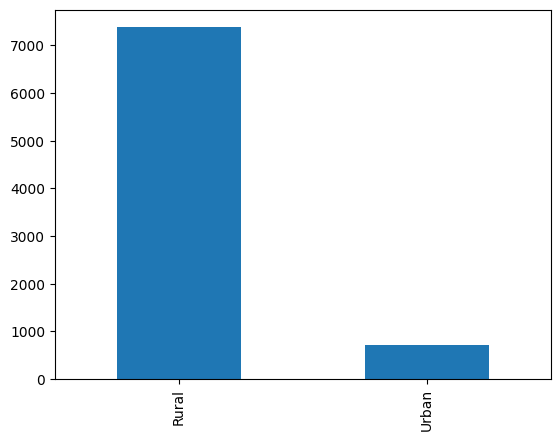

In [27]:
df1.Location_type.value_counts().plot(kind="bar")

<Axes: >

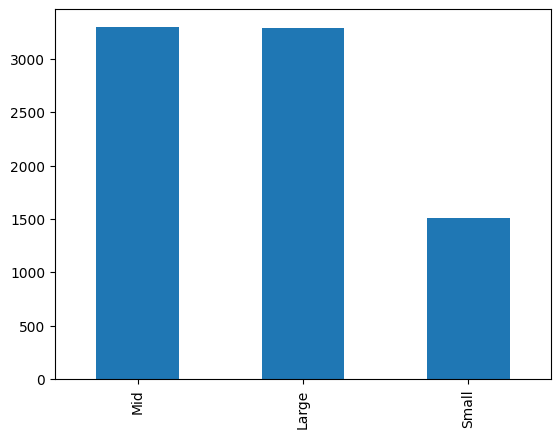

In [28]:
df1.WH_capacity_size.value_counts().plot(kind="bar")

<Axes: >

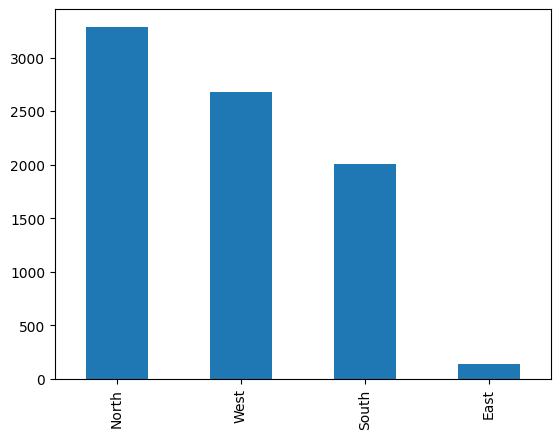

In [29]:
df1.zone.value_counts().plot(kind="bar")

<Axes: >

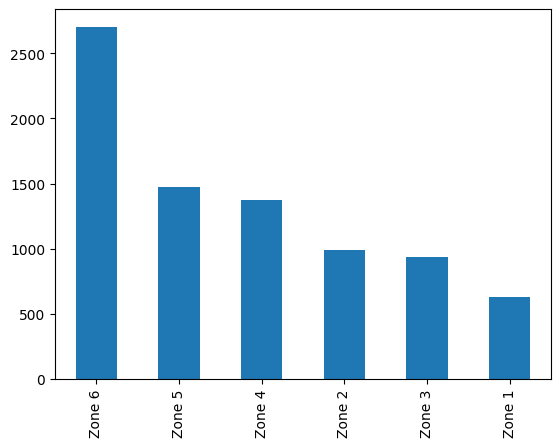

In [30]:
df1.WH_regional_zone.value_counts().plot(kind="bar")

In [31]:
def get_cat_and_num_columns(df):
    numerical=[]
    categorical=[]
    for col in df.columns:
        if df[col].dtype=='O':
            categorical.append(col)
        elif df[col].dtype=='int64' or df[col].dtype=='float64':
            numerical.append(col)
    return categorical,numerical

In [32]:
cat_col,num_col= get_cat_and_num_columns(df1)

In [33]:
cat_col

['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone']

In [34]:
num_col

['num_refill_req_l3m',
 'Competitor_in_mkt',
 'retail_shop_num',
 'distributor_num',
 'dist_from_hub',
 'storage_issue_reported_l3m',
 'product_wg_ton']

In [35]:
df2 = df1.drop(['Location_type'],axis='columns')

In [36]:
cat_col,num_col= get_cat_and_num_columns(df2)
cat_col

['WH_capacity_size', 'zone', 'WH_regional_zone']

In [37]:
for column in df2.columns:
    if df[column].dtypes != "object":
        print(f"{df[column].value_counts()}\n")

3    1396
8    1391
7    1365
5    1356
4    1330
6    1268
Name: num_refill_req_l3m, dtype: int64

2     2771
3     2284
4     2196
5      407
6      200
1      138
7       72
8       27
10       5
9        4
12       1
0        1
Name: Competitor_in_mkt, dtype: int64

4611    10
5009    10
4918    10
5057    10
5022    10
        ..
5834     1
7514     1
3771     1
3261     1
6678     1
Name: retail_shop_num, Length: 3353, dtype: int64

69    168
49    167
47    165
36    161
42    159
40    158
41    156
22    155
37    154
66    154
56    153
63    153
52    153
57    152
35    151
30    150
18    150
51    150
26    149
68    148
59    148
54    148
65    148
27    148
15    147
29    146
46    146
34    146
64    145
44    145
58    145
48    144
31    144
21    144
67    143
17    143
39    142
20    141
33    141
50    140
28    140
23    138
38    138
55    138
24    137
43    137
45    136
32    135
62    133
19    131
70    130
16    128
53    126
25    125
60    120
61    1

In [38]:
dummies=pd.get_dummies(df2.WH_capacity_size)
dummies.head()

,Large,Mid,Small
4,1,0,0
5,0,0,1
6,1,0,0
8,0,0,1
10,1,0,0


In [39]:
df3=pd.concat([df2,dummies],axis='columns')
df3.head()

,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,Competitor_in_mkt,retail_shop_num,distributor_num,dist_from_hub,storage_issue_reported_l3m,product_wg_ton,Large,Mid,Small
4,Large,North,Zone 5,3,2,4740,42,112,18,24071,1,0,0
5,Small,West,Zone 1,8,2,5053,37,152,23,32134,0,0,1
6,Large,West,Zone 6,8,4,4449,38,77,24,30142,1,0,0
8,Small,South,Zone 6,8,4,5381,42,124,13,18082,0,0,1
10,Large,North,Zone 6,7,3,4623,31,150,17,21125,1,0,0


In [40]:
df4 = df3.drop(['WH_capacity_size'],axis='columns')

In [41]:
df4.shape

(8106, 12)

In [42]:
df5 = df4.drop(['zone'],axis='columns')

In [43]:
df5.head()

,WH_regional_zone,num_refill_req_l3m,Competitor_in_mkt,retail_shop_num,distributor_num,dist_from_hub,storage_issue_reported_l3m,product_wg_ton,Large,Mid,Small
4,Zone 5,3,2,4740,42,112,18,24071,1,0,0
5,Zone 1,8,2,5053,37,152,23,32134,0,0,1
6,Zone 6,8,4,4449,38,77,24,30142,1,0,0
8,Zone 6,8,4,5381,42,124,13,18082,0,0,1
10,Zone 6,7,3,4623,31,150,17,21125,1,0,0


In [44]:
def reg_zone (x):
    l = x.split()
    return l[-1]

In [45]:
df5["regional_zone_no"] = df5["WH_regional_zone"].apply(reg_zone)

In [46]:
df6 = df5.drop("WH_regional_zone", axis =1)

In [47]:
df6.columns

Index(['num_refill_req_l3m', 'Competitor_in_mkt', 'retail_shop_num',
       'distributor_num', 'dist_from_hub', 'storage_issue_reported_l3m',
       'product_wg_ton', 'Large', 'Mid', 'Small', 'regional_zone_no'],
      dtype='object')

In [48]:
df6.head()

,num_refill_req_l3m,Competitor_in_mkt,retail_shop_num,distributor_num,dist_from_hub,storage_issue_reported_l3m,product_wg_ton,Large,Mid,Small,regional_zone_no
4,3,2,4740,42,112,18,24071,1,0,0,5
5,8,2,5053,37,152,23,32134,0,0,1,1
6,8,4,4449,38,77,24,30142,1,0,0,6
8,8,4,5381,42,124,13,18082,0,0,1,6
10,7,3,4623,31,150,17,21125,1,0,0,6


In [149]:
from sklearn.model_selection import train_test_split

In [152]:
X = df6.drop(["product_wg_ton"],axis=1)
X

,num_refill_req_l3m,Competitor_in_mkt,retail_shop_num,distributor_num,dist_from_hub,storage_issue_reported_l3m,Large,Mid,Small,regional_zone_no
4,3,2,4740,42,112,18,1,0,0,5
5,8,2,5053,37,152,23,0,0,1,1
6,8,4,4449,38,77,24,1,0,0,6
8,8,4,5381,42,124,13,0,0,1,6
10,7,3,4623,31,150,17,1,0,0,6
...,...,...,...,...,...,...,...,...,...,...
16608,3,2,6678,39,201,18,0,1,0,4
16609,7,4,5503,38,156,18,0,0,1,1
16615,3,6,4779,70,240,14,1,0,0,6
16617,5,4,4514,50,211,24,1,0,0,6


In [153]:
y = df6["product_wg_ton"]
y

4        24071
5        32134
6        30142
8        18082
10       21125
         ...  
16608    21085
16609    25101
16615    16094
16617    28117
16619    38097
Name: product_wg_ton, Length: 8106, dtype: int64

In [154]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [155]:
len(X_train)

6484

In [157]:
len(y_test)

1622

In [158]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [58]:
from google.colab import files
uploaded=files.upload()

Saving supply_test.csv to supply_test.csv


In [60]:
test_dataset=pd.read_csv("supply_test.csv")
test_dataset.head(10)

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,16621,WH_116621,EID_66621,Rural,Large,North,Zone 5,5,0,3,...,0,156,30.0,2006.0,24,0,A,2,5,30132
1,16622,WH_116622,EID_66622,Rural,Large,North,Zone 5,5,0,2,...,1,79,31.0,2019.0,5,1,C,2,24,6075
2,16623,WH_116623,EID_66623,Rural,Small,North,Zone 6,3,0,3,...,1,70,41.0,2008.0,19,1,A+,5,9,24076
3,16624,WH_116624,EID_66624,Rural,Mid,West,Zone 4,5,2,2,...,1,255,33.0,2017.0,9,1,A+,3,11,13092
4,16625,WH_116625,EID_66625,Urban,Mid,North,Zone 4,6,0,4,...,0,205,20.0,1999.0,25,0,B,4,26,29071
5,16626,WH_116626,EID_66626,Rural,Small,North,Zone 1,1,0,2,...,1,240,26.0,NaN,14,1,B,2,31,19127
6,16627,WH_116627,EID_66627,Rural,Small,West,Zone 1,2,0,5,...,1,83,27.0,NaN,8,0,B,3,21,10083
7,16628,WH_116628,EID_66628,Rural,Large,North,Zone 6,4,0,2,...,1,176,NaN,2017.0,5,0,A,5,23,7089
8,16629,WH_116629,EID_66629,Rural,Large,North,Zone 6,7,0,3,...,1,156,36.0,NaN,10,1,A+,1,6,14122
9,16630,WH_116630,EID_66630,Rural,Small,North,Zone 1,3,0,2,...,1,260,40.0,2015.0,10,1,A,3,3,14101


In [61]:
test_dataset.shape

(5529, 25)

In [62]:
test_dataset.dtypes

Unnamed: 0                        int64
Ware_house_ID                    object
WH_Manager_ID                    object
Location_type                    object
WH_capacity_size                 object
zone                             object
WH_regional_zone                 object
num_refill_req_l3m                int64
transport_issue_l1y               int64
Competitor_in_mkt                 int64
retail_shop_num                   int64
wh_owner_type                    object
distributor_num                   int64
flood_impacted                    int64
flood_proof                       int64
electric_supply                   int64
dist_from_hub                     int64
workers_num                     float64
wh_est_year                     float64
storage_issue_reported_l3m        int64
temp_reg_mach                     int64
approved_wh_govt_certificate     object
wh_breakdown_l3m                  int64
govt_check_l3m                    int64
product_wg_ton                    int64


In [63]:
test_dataset.columns

Index(['Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID', 'Location_type',
       'WH_capacity_size', 'zone', 'WH_regional_zone', 'num_refill_req_l3m',
       'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num',
       'wh_owner_type', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [65]:
test_dataset.describe()

,Unnamed: 0,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,5529.00000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5319.000000,2844.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000
mean,19385.00000,4.007235,0.765600,3.106167,4980.695424,42.128052,0.104178,0.049919,0.657262,163.899982,29.010528,2009.572785,17.085549,0.298426,3.477302,18.892205,22052.334599
std,1596.22915,2.604325,1.187567,1.128396,1049.617325,15.959934,0.305519,0.217797,0.474668,62.544704,7.848478,7.473201,9.206551,0.457609,1.700717,8.716737,11645.738485
min,16621.00000,0.000000,0.000000,1.000000,1953.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,18003.00000,2.000000,0.000000,2.000000,4310.000000,28.000000,0.000000,0.000000,0.000000,110.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,12143.000000
50%,19385.00000,4.000000,0.000000,3.000000,4863.000000,42.000000,0.000000,0.000000,1.000000,165.000000,28.000000,2010.000000,17.000000,0.000000,3.000000,21.000000,22099.000000
75%,20767.00000,6.000000,1.000000,4.000000,5492.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30099.000000
max,22149.00000,8.000000,5.000000,9.000000,10846.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55144.000000


In [66]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    5529 non-null   int64  
 1   Ware_house_ID                 5529 non-null   object 
 2   WH_Manager_ID                 5529 non-null   object 
 3   Location_type                 5529 non-null   object 
 4   WH_capacity_size              5529 non-null   object 
 5   zone                          5529 non-null   object 
 6   WH_regional_zone              5529 non-null   object 
 7   num_refill_req_l3m            5529 non-null   int64  
 8   transport_issue_l1y           5529 non-null   int64  
 9   Competitor_in_mkt             5529 non-null   int64  
 10  retail_shop_num               5529 non-null   int64  
 11  wh_owner_type                 5529 non-null   object 
 12  distributor_num               5529 non-null   int64  
 13  flo

In [67]:
test_dataset.isnull().sum()

Unnamed: 0                         0
Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      210
wh_est_year                     2685
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     206
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [68]:
test_dataset=test_dataset.dropna()
test_dataset.isnull().sum()
test_dataset.head(10)


,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,16621,WH_116621,EID_66621,Rural,Large,North,Zone 5,5,0,3,...,0,156,30.0,2006.0,24,0,A,2,5,30132
1,16622,WH_116622,EID_66622,Rural,Large,North,Zone 5,5,0,2,...,1,79,31.0,2019.0,5,1,C,2,24,6075
2,16623,WH_116623,EID_66623,Rural,Small,North,Zone 6,3,0,3,...,1,70,41.0,2008.0,19,1,A+,5,9,24076
3,16624,WH_116624,EID_66624,Rural,Mid,West,Zone 4,5,2,2,...,1,255,33.0,2017.0,9,1,A+,3,11,13092
4,16625,WH_116625,EID_66625,Urban,Mid,North,Zone 4,6,0,4,...,0,205,20.0,1999.0,25,0,B,4,26,29071
9,16630,WH_116630,EID_66630,Rural,Small,North,Zone 1,3,0,2,...,1,260,40.0,2015.0,10,1,A,3,3,14101
11,16632,WH_116632,EID_66632,Rural,Mid,West,Zone 4,8,0,4,...,1,184,24.0,2017.0,10,0,B,2,11,13132
14,16635,WH_116635,EID_66635,Rural,Mid,South,Zone 2,4,1,2,...,1,143,37.0,2017.0,11,0,A,6,1,15129
16,16637,WH_116637,EID_66637,Rural,Mid,North,Zone 4,4,0,3,...,1,204,29.0,2006.0,25,1,A,3,26,32076
19,16640,WH_116640,EID_66640,Rural,Mid,South,Zone 3,6,0,3,...,0,119,41.0,2004.0,24,1,A+,2,27,31076


In [69]:
test_dataset.isnull().sum()

Unnamed: 0                      0
Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [78]:
test_dataset1=test_dataset.drop(['Unnamed: 0', 'flood_proof','Ware_house_ID', 'WH_Manager_ID', 'wh_est_year', 'approved_wh_govt_certificate', 'temp_reg_mach', 'wh_breakdown_l3m',
       'govt_check_l3m','electric_supply','workers_num','flood_impacted','transport_issue_l1y'],axis='columns')

In [79]:
test_dataset1.columns

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'num_refill_req_l3m', 'Competitor_in_mkt', 'retail_shop_num',
       'wh_owner_type', 'distributor_num', 'dist_from_hub',
       'storage_issue_reported_l3m', 'product_wg_ton'],
      dtype='object')

In [80]:
for column in test_dataset1.columns:
    if test_dataset[column].dtypes=="object":
        print(test_dataset[column].value_counts(),"\n")

Rural    2393
Urban     234
Name: Location_type, dtype: int64 

Large    1101
Mid      1048
Small     478
Name: WH_capacity_size, dtype: int64 

North    1083
West      849
South     642
East       53
Name: zone, dtype: int64 

Zone 6    879
Zone 5    490
Zone 4    456
Zone 2    298
Zone 3    294
Zone 1    210
Name: WH_regional_zone, dtype: int64 

Company Owned    1450
Rented           1177
Name: wh_owner_type, dtype: int64 



In [83]:
test_dataset1['wh_owner_type'].unique()

array(['Company Owned', 'Rented'], dtype=object)

In [84]:
test_dataset1['wh_owner_type'].value_counts()

Company Owned    1450
Rented           1177
Name: wh_owner_type, dtype: int64

In [85]:
test_dataset1['Location_type'].unique()

array(['Rural', 'Urban'], dtype=object)

In [86]:
test_dataset1['Location_type'].value_counts()

Rural    2393
Urban     234
Name: Location_type, dtype: int64

In [87]:
test_dataset1['WH_capacity_size'].unique()

array(['Large', 'Small', 'Mid'], dtype=object)

In [88]:
test_dataset1['WH_capacity_size'].value_counts()

Large    1101
Mid      1048
Small     478
Name: WH_capacity_size, dtype: int64

In [90]:
test_dataset1['zone'].unique()

array(['North', 'West', 'South', 'East'], dtype=object)

In [91]:
test_dataset1['zone'].value_counts()

North    1083
West      849
South     642
East       53
Name: zone, dtype: int64

<Axes: >

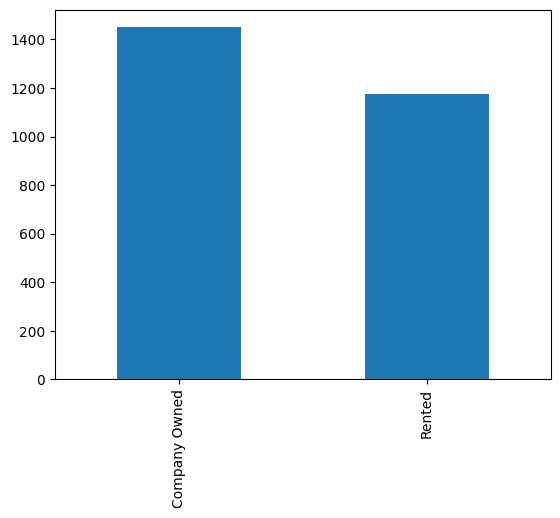

In [92]:
test_dataset1.wh_owner_type.value_counts().plot(kind="bar")

<Axes: >

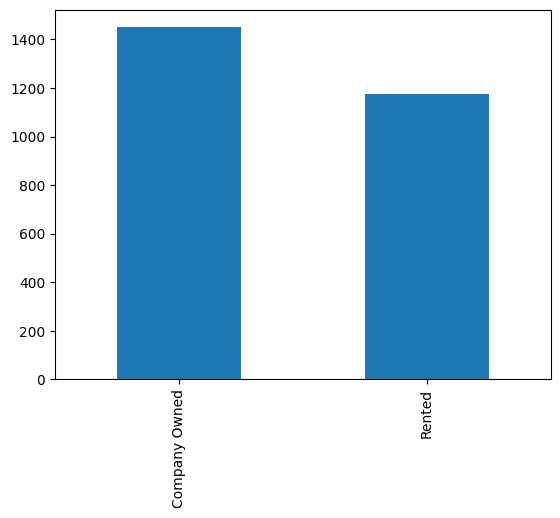

In [93]:
test_dataset1.wh_owner_type.value_counts().plot(kind="bar")

In [95]:
test_dataset1.columns


Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'num_refill_req_l3m', 'Competitor_in_mkt', 'retail_shop_num',
       'wh_owner_type', 'distributor_num', 'dist_from_hub',
       'storage_issue_reported_l3m', 'product_wg_ton'],
      dtype='object')

In [160]:
test_dataset1.head(10)

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,dist_from_hub,storage_issue_reported_l3m,product_wg_ton
0,Rural,Large,North,Zone 5,5,3,5590,Company Owned,15,156,24,30132
1,Rural,Large,North,Zone 5,5,2,5856,Company Owned,40,79,5,6075
2,Rural,Small,North,Zone 6,3,3,4803,Rented,40,70,19,24076
3,Rural,Mid,West,Zone 4,5,2,4784,Rented,15,255,9,13092
4,Urban,Mid,North,Zone 4,6,4,3699,Rented,24,205,25,29071
9,Rural,Small,North,Zone 1,3,2,6250,Company Owned,15,260,10,14101
11,Rural,Mid,West,Zone 4,8,4,7293,Company Owned,59,184,10,13132
14,Rural,Mid,South,Zone 2,4,2,5006,Company Owned,38,143,11,15129
16,Rural,Mid,North,Zone 4,4,3,4114,Rented,29,204,25,32076
19,Rural,Mid,South,Zone 3,6,3,4092,Rented,38,119,24,31076


<Axes: xlabel='zone', ylabel='Count'>

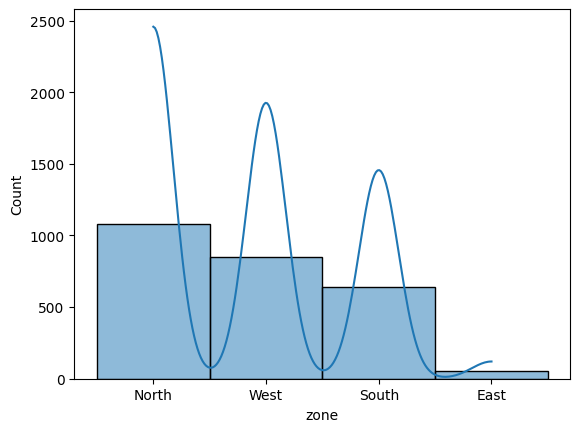

In [162]:
sns.histplot(data=test_dataset1,x='zone',kde=True)

<Axes: xlabel='Location_type', ylabel='Count'>

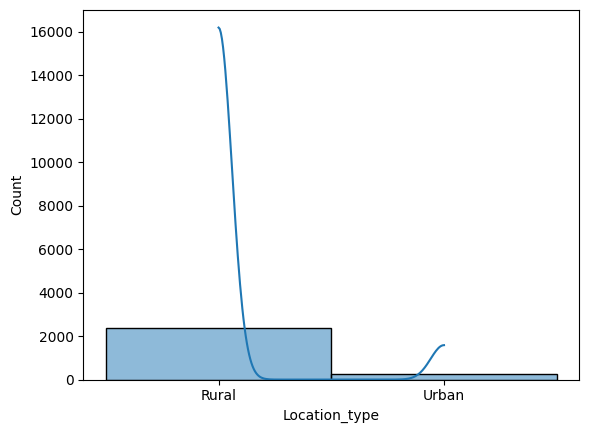

In [163]:
sns.histplot(data=test_dataset1,x='Location_type',kde=True)

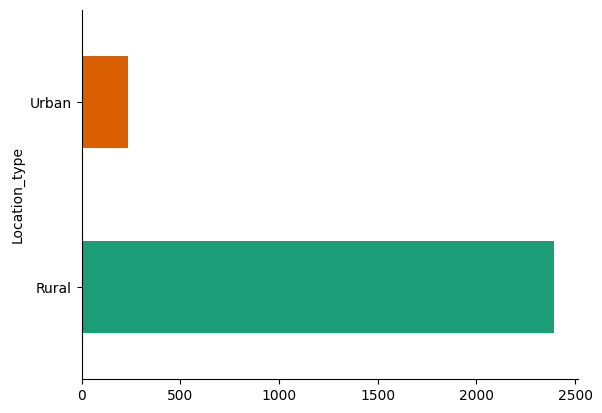

In [96]:
test_dataset1.groupby('Location_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

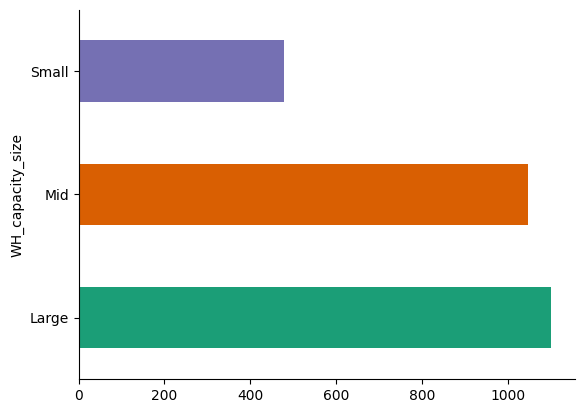

In [97]:
test_dataset1.groupby('WH_capacity_size').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)


<Axes: xlabel='Competitor_in_mkt', ylabel='Count'>

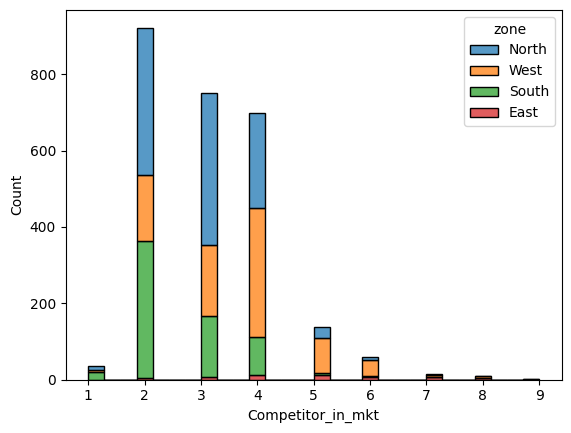

In [171]:
sns.histplot(data=test_dataset1,x='Competitor_in_mkt',hue='zone',multiple='stack')

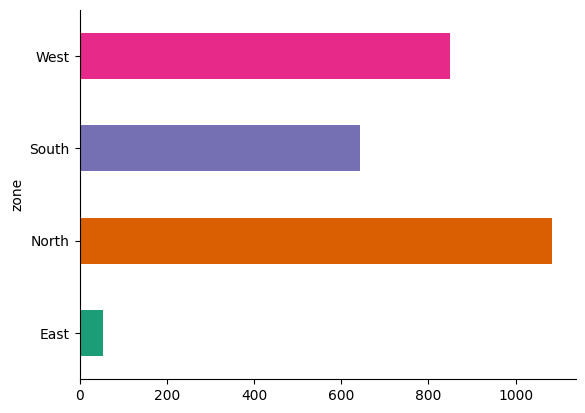

In [98]:
test_dataset1.groupby('zone').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='Competitor_in_mkt', ylabel='WH_regional_zone'>

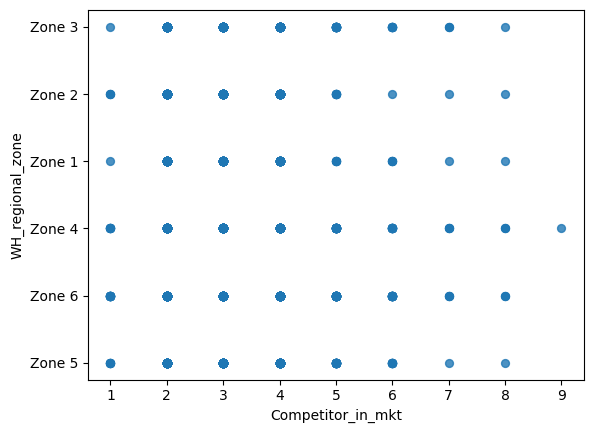

In [173]:
test_dataset1.plot(kind='scatter', x='Competitor_in_mkt', y='WH_regional_zone', s=32, alpha=.8)


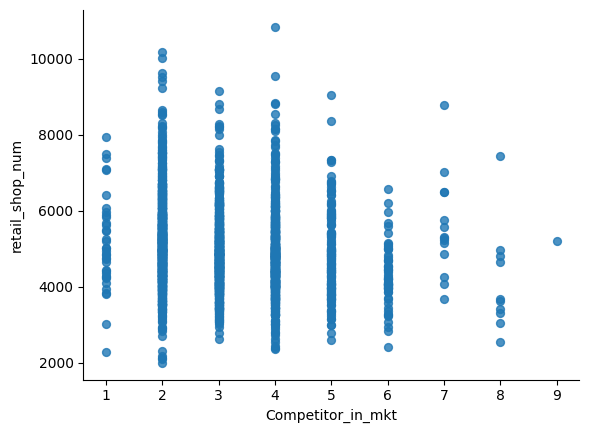

In [102]:
test_dataset1.plot(kind='scatter', x='Competitor_in_mkt', y='retail_shop_num', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [105]:
test_dataset1.columns

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'num_refill_req_l3m', 'Competitor_in_mkt', 'retail_shop_num',
       'wh_owner_type', 'distributor_num', 'dist_from_hub',
       'storage_issue_reported_l3m', 'product_wg_ton'],
      dtype='object')

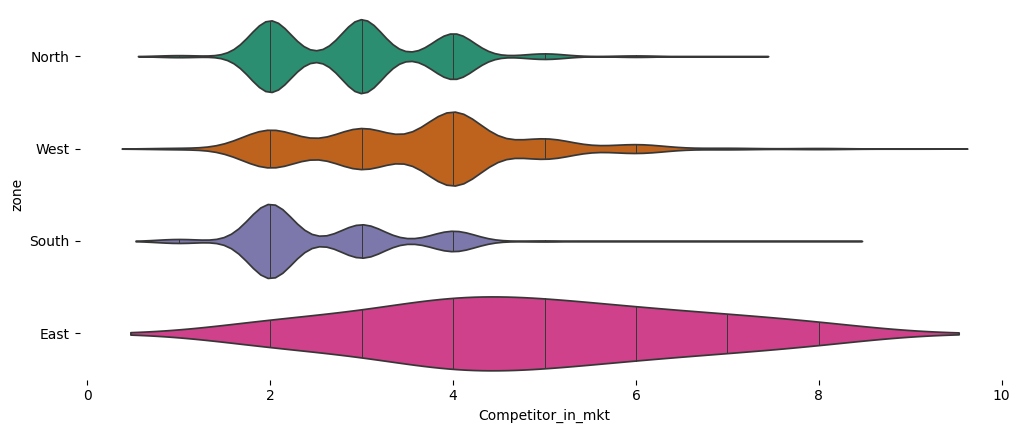

In [106]:
figsize = (12, 1.2 * len(test_dataset1['zone'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(test_dataset1, x='Competitor_in_mkt', y='zone', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [108]:
def get_cat_and_num_columns(test_dataset):
    numerical=[]
    categorical=[]
    for col in test_dataset.columns:
        if test_dataset[col].dtype=='O':
            categorical.append(col)
        elif test_dataset[col].dtype=='int64' or test_dataset[col].dtype=='float64':
            numerical.append(col)
    return categorical,numerical

In [109]:
cat_col,num_col= get_cat_and_num_columns(test_dataset1)

In [110]:
cat_col

['Location_type',
 'WH_capacity_size',
 'zone',
 'WH_regional_zone',
 'wh_owner_type']

In [111]:
num_col

['num_refill_req_l3m',
 'Competitor_in_mkt',
 'retail_shop_num',
 'distributor_num',
 'dist_from_hub',
 'storage_issue_reported_l3m',
 'product_wg_ton']

In [112]:
test_dataset2 = test_dataset1.drop(['Location_type'],axis='columns')

In [113]:
cat_col,num_col= get_cat_and_num_columns(test_dataset2)

In [114]:
cat_col

['WH_capacity_size', 'zone', 'WH_regional_zone', 'wh_owner_type']

In [115]:
for column in test_dataset2.columns:
    if test_dataset[column].dtypes != "object":
        print(f"{test_dataset[column].value_counts()}\n")

5    482
4    444
6    439
3    431
8    425
7    406
Name: num_refill_req_l3m, dtype: int64

2    922
3    751
4    697
5    138
6     58
1     36
7     14
8     10
9      1
Name: Competitor_in_mkt, dtype: int64

4789    6
4286    6
4706    6
5006    6
4098    5
       ..
4647    1
5668    1
5441    1
5040    1
6080    1
Name: retail_shop_num, Length: 1828, dtype: int64

31    66
29    63
64    59
28    57
42    56
21    55
48    55
58    55
24    55
23    54
27    54
65    54
43    52
55    52
70    52
45    52
69    52
40    51
16    51
67    50
51    50
41    49
61    49
20    48
50    47
15    47
17    47
46    47
19    46
54    45
56    45
32    45
49    45
37    45
33    45
62    44
22    43
44    43
36    42
25    42
38    42
26    42
34    42
18    41
39    41
63    41
66    40
52    39
47    39
35    39
59    38
57    37
60    37
30    36
53    35
68    29
Name: distributor_num, dtype: int64

180    22
69     21
188    21
254    21
122    20
       ..
245     6
119     6
74  

In [116]:
dummies=pd.get_dummies(test_dataset2.WH_capacity_size)
dummies.head()

,Large,Mid,Small
0,1,0,0
1,1,0,0
2,0,0,1
3,0,1,0
4,0,1,0


In [117]:
test_dataset3=pd.concat([test_dataset2,dummies],axis='columns')
test_dataset3.head()

,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,dist_from_hub,storage_issue_reported_l3m,product_wg_ton,Large,Mid,Small
0,Large,North,Zone 5,5,3,5590,Company Owned,15,156,24,30132,1,0,0
1,Large,North,Zone 5,5,2,5856,Company Owned,40,79,5,6075,1,0,0
2,Small,North,Zone 6,3,3,4803,Rented,40,70,19,24076,0,0,1
3,Mid,West,Zone 4,5,2,4784,Rented,15,255,9,13092,0,1,0
4,Mid,North,Zone 4,6,4,3699,Rented,24,205,25,29071,0,1,0


In [118]:
test_dataset4 = test_dataset3.drop(['WH_capacity_size'],axis='columns')

In [119]:
test_dataset4.shape

(2627, 13)

In [121]:
test_dataset5=test_dataset4.drop(['zone'],axis='columns')

In [122]:
test_dataset5.head()

,WH_regional_zone,num_refill_req_l3m,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,dist_from_hub,storage_issue_reported_l3m,product_wg_ton,Large,Mid,Small
0,Zone 5,5,3,5590,Company Owned,15,156,24,30132,1,0,0
1,Zone 5,5,2,5856,Company Owned,40,79,5,6075,1,0,0
2,Zone 6,3,3,4803,Rented,40,70,19,24076,0,0,1
3,Zone 4,5,2,4784,Rented,15,255,9,13092,0,1,0
4,Zone 4,6,4,3699,Rented,24,205,25,29071,0,1,0


In [123]:
def reg_zone (x):
    l = x.split()
    return l[-1]

In [131]:
test_dataset6=test_dataset5.drop(["WH_regional_zone","wh_owner_type"],axis='columns')

In [132]:
test_dataset6.head()

,num_refill_req_l3m,Competitor_in_mkt,retail_shop_num,distributor_num,dist_from_hub,storage_issue_reported_l3m,product_wg_ton,Large,Mid,Small
0,5,3,5590,15,156,24,30132,1,0,0
1,5,2,5856,40,79,5,6075,1,0,0
2,3,3,4803,40,70,19,24076,0,0,1
3,5,2,4784,15,255,9,13092,0,1,0
4,6,4,3699,24,205,25,29071,0,1,0


In [140]:
X= test_dataset6.drop(["product_wg_ton"],axis=1)
y = test_dataset6["product_wg_ton"]

In [174]:
model_params = {
    "Linear Regression":{
        "model" : LinearRegression(),
        "params": {
            "fit_intercept": [True, False]
        }
    },
    "Lasso Rregression":{
        "model": Lasso(),
        "params": {
            'alpha': [0.01, 0.1, 1.0, 10.0]
        }
    },
    "Decision Tree":{
        "model": DecisionTreeRegressor(),
        "params":{
            'max_depth': [None, 10, 20, 30]
        }
    },
    "Random Forest":{
        "model": RandomForestRegressor(),
        "params":{
            'n_estimators': [100, 200, 300]

        }
    }
}

In [141]:
scores = []
cv = ShuffleSplit(n_splits=5,test_size=0.2, random_state=0 )

for algo_name, config in model_params.items():
    gs = GridSearchCV(config["model"], config["params"], cv=cv, return_train_score= False)
    gs.fit(X,y)
    scores.append({
        "model": algo_name,
        "best score": gs.best_score_ ,
        "best params": gs.best_params_
    })

In [142]:
pd.DataFrame(scores)

,model,best score,best params
0,Linear Regression,0.979109,{'fit_intercept': True}
1,Lasso Rregression,0.979138,{'alpha': 10.0}
2,Decision Tree,0.966791,{'max_depth': 10}
3,Random Forest,0.977910,{'n_estimators': 300}
4,GradientBoosting,0.979997,{'n_estimators': 100}


In [144]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
models = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    LinearRegression()
]
scores = []
for model in models:
    score = cross_val_score(model, X, y, cv=5)
    scores.append(score.mean())
best_model_index = np.argmax(scores)
print("The best model is:", models[best_model_index])

The best model is: LinearRegression()


In [145]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [146]:
model.fit(X_train, y_train)

LinearRegression()

In [147]:
model.score(X_test,y_test)

0.9786726181850024

In [148]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv = cv)

array([0.97937756, 0.97911373, 0.97971825, 0.97733929, 0.97999651])